<a href="https://colab.research.google.com/github/blortle-dev/data-science-lasa/blob/main/Unit%206/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, as `elpd_loo` is for comparing multiple models to find which one is better.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when the model relies too much on the data, causing it to closely match the exact original data instead of properly predicting. An example of this is on my Unit 5 Project, where I demonstrated an overfit model:<br />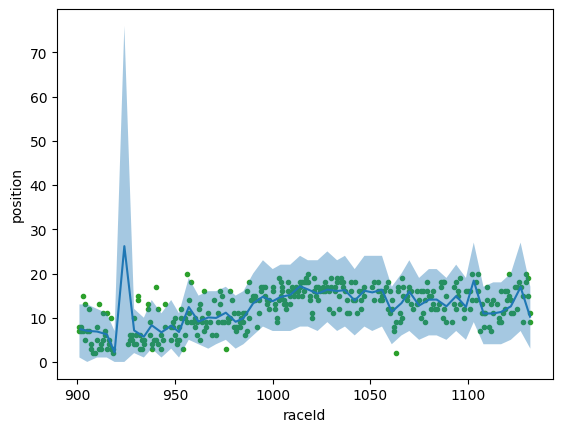
<br />As we can see, the model is very jagged, moving up and down to get between the data points. In contrast, a well fit model is a lot smoother, and would look like this:<br />
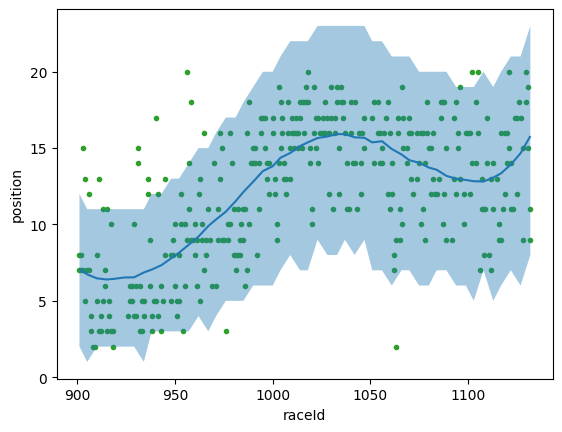

**Task3**:

How do we mitigate overfitting?

Overfitting can be mitigated by modifying your model to be less specific. For example, in the models above, the polynomial model started overfitting at around the 5th degree.

**Task4**:

How do we mitigate underfitting?

Underfitting is where your model doesn't use enough data, and needs to be more specific. An example is this model (also from my Unit 5 Project):<br />
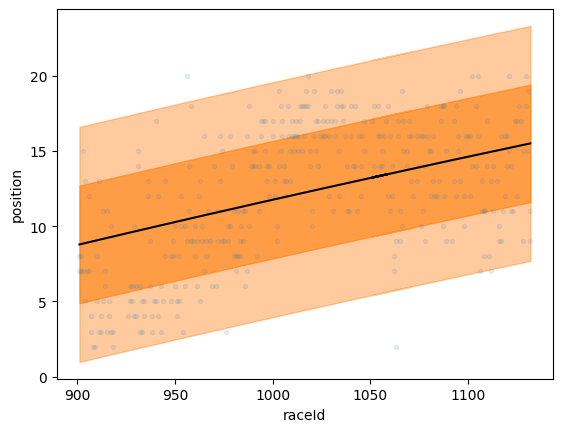
<br /> As we can see, this model is just a straight line that doesn't match the data at all. This is also visible with how bad of a fit the model is in the posterior predictive check. **To fix this, we need to make our model more specific.** In the case of my Unit 5 Project, a 2nd degree polynomial wouldn't be able to follow my data that well, so I had to use a higher degree polynomial to prevent it from underfitting.

**Task5**:

Why would we want more than one predictor in a model?

Having more than 1 predictor in a model helps the model make better predictions and makes it more accurate for modelling data.

**Task6**:

Can we have too many predictors? How would we know?

Yes, you can most definitley have too many predictors. The more predictors you have, the less your model relies on the observed data and more on the predictors. One way to know if you have too many predictors is by checking that the model does still fit your observed data, without over or underfitting.

**Task7**:

What is variable selection, and how does it work?

Variable selection is about asking questions such as
```
do we really need multiple predictors?
if so, how many do we need?
and which ones? Are some better than others? The same as others?
```
to help you figure out how you want to make your model.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

Each of the three models above is more complicated than the next, and generally you want to always try to use the simplest one. Using the simplest model not only simplifies the creation process, but if it is accurate enough for what you're trying to predict, it will run faster and be more efficient than the more complex models.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

To visualize multiple linear regression models, we can use `bmb.interpret.plot_predictions()`, and we'll get graphs like this:
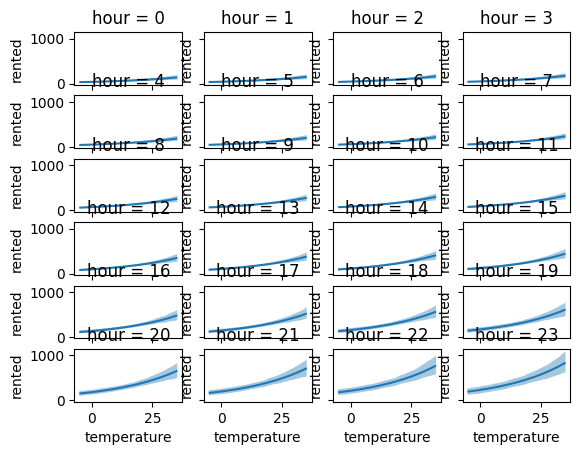

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with free throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [7]:
!pip install bambi

In [8]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb

In [9]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [10]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

The code below was my attempts to try and figure out (and failing) how to do this:

Output()

Output()

ERROR:pymc.stats.convergence:There were 37 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FGp', ylabel='FTp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FGp', ylabel='FTp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FGp', ylabel='FTp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FGp', ylabel='FTp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FGp', ylabel='FTp'>,
         <Axes: xlabel='FGp', ylabel='FTp'>]], dtype=object))

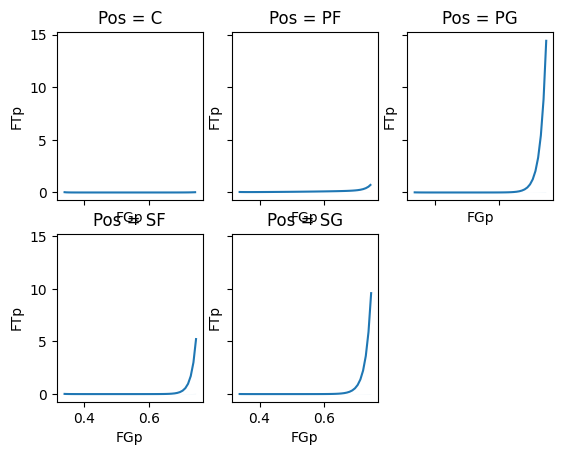

In [18]:
# Attempt 3 (first 2 were overwritten)
model_mlb_bmb = bmb.Model("FTp ~ FGp + Pos", bb, family="negativebinomial")
idata_mlb_bmb = model_mlb_bmb.fit(idata_kwargs={"log_likelihood":True}, target_accept=.98)

bmb.interpret.plot_predictions(model_mlb_bmb, idata_mlb_bmb, ["FGp", "Pos"],
                               subplot_kwargs={"group":None, "panel":"Pos"},
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

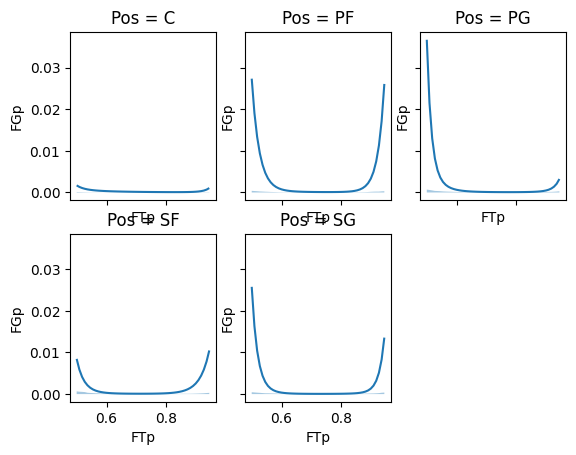

In [19]:
# Attempt 4
model_mlb_bmb = bmb.Model("FGp ~ FTp + Pos", bb, family="negativebinomial")
idata_mlb_bmb = model_mlb_bmb.fit(idata_kwargs={"log_likelihood":True}, target_accept=.98)

bmb.interpret.plot_predictions(model_mlb_bmb, idata_mlb_bmb, ["FTp", "Pos"],
                               subplot_kwargs={"group":None, "panel":"Pos"},
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True})

This was the closest I got. (I could only figure out one model)

I'm disappointed with how confused I was and, given more time, could probably understand better and figure it out.

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

I was only able to figure out one model in Task 10, so I don't have a comparison for this question. However, if I were to guess, the 'best' model would be, I would pick #3 (predictors free throw percentage and position (with position interacting with free throw percentage)), as it seems to be a good balance between containing the most relevant info taken into account while not having extra unneeded or irrelevant parameters.